In [19]:
# import important modules
import numpy as np
import pandas as pd

# sklearn modules
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB # classifier 

from sklearn.metrics import (
    accuracy_score,
    classification_report,
    plot_confusion_matrix,
)
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# text preprocessing modules
from string import punctuation 

# text preprocessing modules
from nltk.tokenize import word_tokenize

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
import re #regular expression

nltk.download('stopwords')
nltk.download('omw-1.4')

# Download dependency
for dependency in (
    "brown",
    "names",
    "wordnet",
    "averaged_perceptron_tagger",
    "universal_tagset",
):
    nltk.download(dependency)
    
import warnings
warnings.filterwarnings("ignore")
# seeding
np.random.seed(123)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aksha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Aksha\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\omw-1.4.zip.
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Aksha\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package names to
[nltk_data]     C:\Users\Aksha\AppData\Roaming\nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Aksha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Aksha\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloa

In [20]:
# load data
data = pd.read_csv("../data/labeledTrainData.tsv", sep='\t')

In [21]:
# show top five rows of data
data.head() 

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [22]:
# check the shape of the data
data.shape

(25000, 3)

In [23]:
# check missing values in data
data.isnull().sum()

id           0
sentiment    0
review       0
dtype: int64

In [24]:
# evalute news sentiment distribution
data.sentiment.value_counts()

1    12500
0    12500
Name: sentiment, dtype: int64

### Data Preparation 

In [25]:
stop_words =  stopwords.words('english')

def text_cleaning(text, remove_stop_words=True, lemmatize_words=True):
    # Clean the text, with the option to remove stop_words and to lemmatize word

    # Clean the text
    text = re.sub(r"[^A-Za-z0-9]", " ", text)
    text = re.sub(r"\'s", " ", text)
    text =  re.sub(r'http\S+',' link ', text)
    text = re.sub(r'\b\d+(?:\.\d+)?\s+', '', text) # remove numbers
        
    # Remove punctuation from text
    text = ''.join([c for c in text if c not in punctuation])
    
    # Optionally, remove stop words
    if remove_stop_words:
        text = text.split()
        text = [w for w in text if not w in stop_words]
        text = " ".join(text)
    
    # Optionally, shorten words to their stems
    if lemmatize_words:
        text = text.split()
        lemmatizer = WordNetLemmatizer() 
        lemmatized_words = [lemmatizer.lemmatize(word) for word in text]
        text = " ".join(lemmatized_words)
    
    # Return a list of words
    return(text)

In [26]:
#clean the review
data["cleaned_review"] = data["review"].apply(text_cleaning)


In [27]:
#split features and target from train data 
X = data["cleaned_review"]
y = data.sentiment.values

In [28]:
# Transform data 
#tfidf_transformer = TfidfVectorizer(lowercase=False)#

#tfidf_transformer.fit(X)

#transform data 
#X_transformed = tfidf_transformer.transform(X)


In [29]:
# split data into train and validate

X_train, X_valid, y_train, y_valid = train_test_split(
    X,
    y,
    test_size=0.15,
    random_state=42,
    shuffle=True,
    stratify=y,
)

### Classifier Creation

In [30]:
# The multinomial Naive Bayes classifier is suitable for classification with discrete features
# (e.g., word counts for text classification).

# Create a classifier in pipeline
sentiment_classifier = Pipeline(steps=[
                                 ('pre_processing',TfidfVectorizer(lowercase=False)),
                                 ('naive_bayes',MultinomialNB())
                                 ])

In [31]:
# train the sentiment classifier 
sentiment_classifier.fit(X_train,y_train)

Pipeline(steps=[('pre_processing', TfidfVectorizer(lowercase=False)),
                ('naive_bayes', MultinomialNB())])

In [32]:
# test model performance on valid data 
y_preds = sentiment_classifier.predict(X_valid)

In [33]:
# evalute model performance by using log_loss in the validation data
accuracy_score(y_valid,y_preds)

0.8626666666666667

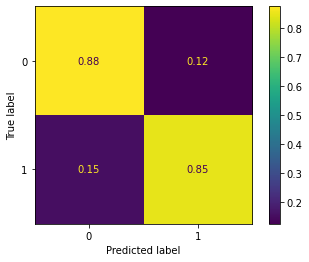

In [34]:
# plot the comfusion matrix
plot_confusion_matrix(sentiment_classifier, X_valid, y_valid, normalize='true')

In [35]:
# check the classification report
print(classification_report(y_valid, y_preds))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1875
           1       0.87      0.85      0.86      1875

    accuracy                           0.86      3750
   macro avg       0.86      0.86      0.86      3750
weighted avg       0.86      0.86      0.86      3750



In [36]:
#save model 
import joblib 

joblib.dump(sentiment_classifier, '../models/sentiment_model_pipeline.pkl')

['../models/sentiment_model_pipeline.pkl']